## ADS505 Final Project
## Dataset: Hotel Reservations
## Vivian Do, Mirna Philip, Halee Staggs


### Attribute Description

| Column Name                           | Description                                                                                      |
|---------------------------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID                            | Unique identifier of each booking                                                                |
| no_of_adults                          | Number of adults                                                                                 |
| no_of_children                        | Number of Children                                                                               |
| no_of_weekend_nights                  | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  |
| no_of_week_nights                     | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel      |
| type_of_meal_plan                     | Type of meal plan booked by the customer                                                         |
| required_car_parking_space            | Does the customer require a car parking space? (0 - No, 1- Yes)                                   |
| room_type_reserved                    | Type of room reserved by the customer                                                             |
| lead_time                             | Number of days between the date of booking and the arrival date                                   |
| arrival_year                          | Year of arrival date                                                                             |
| arrival_month                         | Month of arrival date                                                                            |
| arrival_date                          | Date of the month                                                                                |
| market_segment_type                   | Market segment designation                                                                       |
| repeated_guest                        | Is the customer a repeated guest? (0 - No, 1- Yes)                                               |
| no_of_previous_cancellations          | Number of previous bookings that were canceled by the customer prior to the current booking     |
| no_of_previous_bookings_not_canceled  | Number of previous bookings not canceled by the customer prior to the current booking           |
| avg_price_per_room                    | Average price per day of the reservation; prices of the rooms are dynamic (in euros)            |
| no_of_special_requests                | Total number of special requests made by the customer                                            |
| booking_status                        | Flag indicating if the booking was canceled or not                                               |


### Library and Data Import

In [1]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,  roc_auc_score, roc_curve 
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import set_config
from imblearn.under_sampling import RandomUnderSampler
#!pip install imblearn
from imblearn.metrics import specificity_score, sensitivity_score


no display found. Using non-interactive Agg backend


In [2]:
#!pip install ipympl
import ipympl

In [3]:
#uploating the dataset
df = pd.read_csv('Hotel Reservations.csv')
# display of first three rows  in the dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Understanding the dataset

In [4]:
# Using .columns to show the column names of the DataFrame
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
# Dimensions: 36275 observations and 19 variables
df.shape

(36275, 19)

In [6]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#The sum count of the duplicated values
df.duplicated().sum()

0

In [8]:
#df.describe() provides statistics such as the mean, minimum, standard deviation, and more.
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Numerical Data Insights

In [9]:
# Data related to reservations with zero adults
adult_zero = pd.DataFrame(df[df['no_of_adults'] == 0])
adult_zero['booking_status'].value_counts()

booking_status
Not_Canceled    95
Canceled        44
Name: count, dtype: int64

In [10]:
#Check for rows that report no adults or children
both = pd.DataFrame(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)])
both['booking_status'].value_counts()  # None

Series([], Name: count, dtype: int64)

In [11]:
#Check if any reservations report being not a week or weekend day
#Small amount of sample has no data for weekdays or weeknights
#Can maybe impute with median
no_day_type = pd.DataFrame(df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)])
no_day_type['booking_status'].value_counts()  # Drop these later

booking_status
Not_Canceled    76
Canceled         2
Name: count, dtype: int64

Categorical Data Insights

In [12]:
# Distribution of outcome variable -- Class imbalance, needs to be addressed in training set
print(df['booking_status'].value_counts())
print('\n',df['booking_status'].value_counts()/len(df))

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

 booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: count, dtype: float64


Arrival Year

In [13]:
# Data spans two years (2017-2018)
df['arrival_year'].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

In [14]:
# Create a stacked bar chart to visualize the relationship between arrival year and booking status.
pd.crosstab(df['arrival_year'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Arrival Year by Booking Status')

Text(0.5, 1.0, 'Arrival Year by Booking Status')

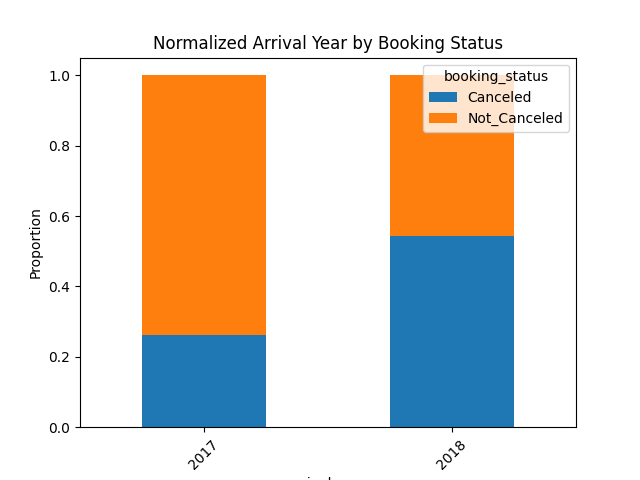

In [15]:
# Create normalized bar charts to illustrate the proportion of booking statuses across different arrival years.
cross_tab = pd.crosstab(index=df['arrival_year'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Arrival Year by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

In [16]:
# Create a cross-tabulation table for arrival year and booking status, including margins and normalization.
pd.crosstab(df['arrival_year'], df['booking_status'], margins = True, normalize = True)

booking_status,Canceled,Not_Canceled,All
arrival_year,,,
2017,0.026492,0.153081,0.179573
2018,0.301144,0.519283,0.820427
All,0.327636,0.672364,1.000000


In [17]:
# Calculating the proportion of booking statuses in the year 2017.
year17 = df[df['arrival_year'] == 2017]
year17['booking_status'].value_counts()/len(year17)

booking_status
Not_Canceled    0.852472
Canceled        0.147528
Name: count, dtype: float64

In [18]:
# Calculating the proportion of booking statuses in the year 2018.
year18 = df[df['arrival_year'] == 2018]
year18['booking_status'].value_counts()/len(year18)

booking_status
Not_Canceled    0.632942
Canceled        0.367058
Name: count, dtype: float64

In [19]:
# Calculate the difference in cancellation rates between two years.
year_cancel_diff = 0.367-0.148
year_cancel_diff

0.219

Car Parking Space

In [20]:
# Count the occurrences of 'required_car_parking_space' values.
df['required_car_parking_space'].value_counts()

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

In [21]:
## Create a stacked bar chart to visualize the relationship between parking space and booking status.
pd.crosstab(df['required_car_parking_space'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Parking Space by Booking Status')

Text(0.5, 1.0, 'Parking Space by Booking Status')

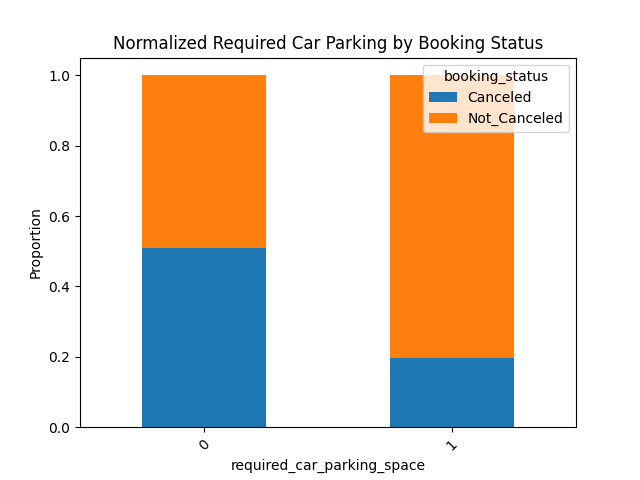

In [22]:
# Create normalized bar charts to illustrate the proportion of booking statuses based on parking space requirements.
cross_tab = pd.crosstab(index=df['required_car_parking_space'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Required Car Parking by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Repeated Guest

In [23]:
# Count the occurrences of 'repeated_guest' values.
df['repeated_guest'].value_counts()

repeated_guest
0    35345
1      930
Name: count, dtype: int64

In [24]:
# Create a stacked bar chart to visualize the relationship between repeated guest status and booking outcomes.
pd.crosstab(df['repeated_guest'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Repeated Guest by Booking Status')

Text(0.5, 1.0, 'Repeated Guest by Booking Status')

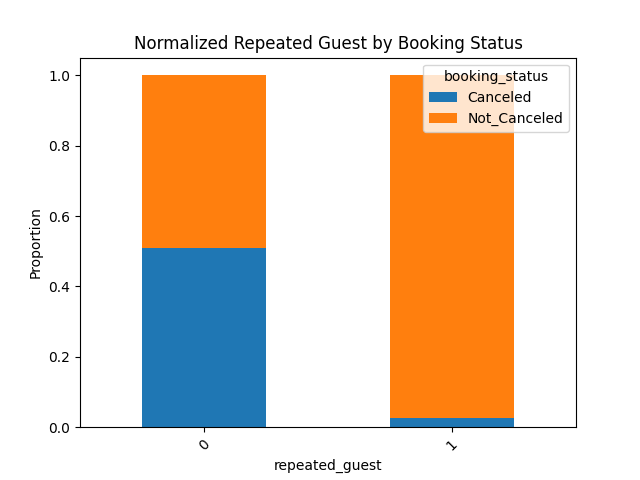

In [25]:
# Create normalized bar charts to illustrate the proportion of booking statuses for repeated and non-repeated guests.
cross_tab = pd.crosstab(index=df['repeated_guest'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Repeated Guest by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Arrival Month

In [26]:
# Count the occurrences of 'arrival_month' values.
df['arrival_month'].value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

In [27]:
# Create a stacked bar chart to visualize the relationship between arrival month and booking status.
pd.crosstab(df['arrival_month'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Arrival Month by Booking Status')

Text(0.5, 1.0, 'Arrival Month by Booking Status')

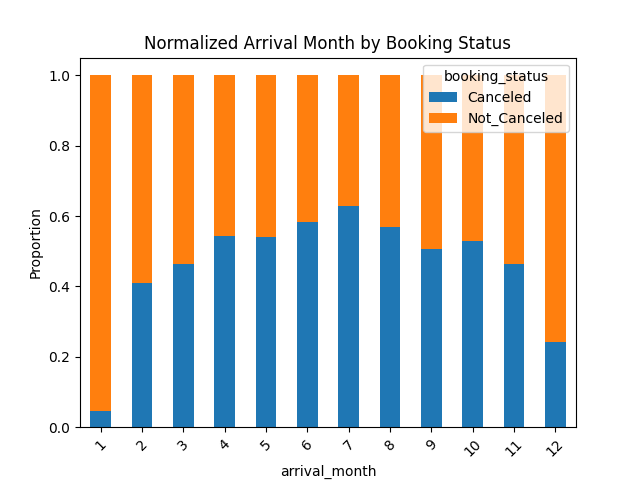

In [28]:
# Create a normalized bar chart to visualize the proportion of booking statuses based on arrival months.
cross_tab = pd.crosstab(index=df['arrival_month'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Arrival Month by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Meal Plan

In [29]:
# Count the occurrences of 'type_of_meal_plan' values.
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [30]:
# Create a stacked bar chart to visualize the relationship between meal plans and booking status.
pd.crosstab(df['type_of_meal_plan'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Meal Plan by Booking Status')

Text(0.5, 1.0, 'Meal Plan by Booking Status')

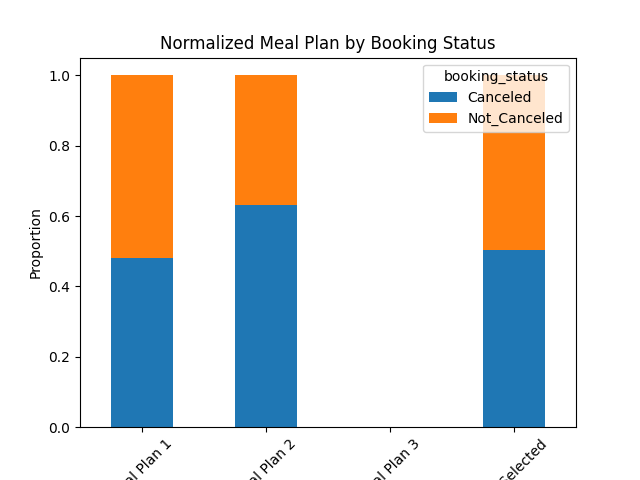

In [31]:
# Create a normalized bar chart to visualize the proportion of booking statuses based on meal plans.
cross_tab = pd.crosstab(index=df['type_of_meal_plan'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Meal Plan by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Room Type

In [32]:
# Count the occurrences of 'room_type_reserved' values.
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [33]:
# Generate a stacked bar chart to depict the correlation between room types and booking status.
pd.crosstab(df['room_type_reserved'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Room Type by Booking Status')

Text(0.5, 1.0, 'Room Type by Booking Status')

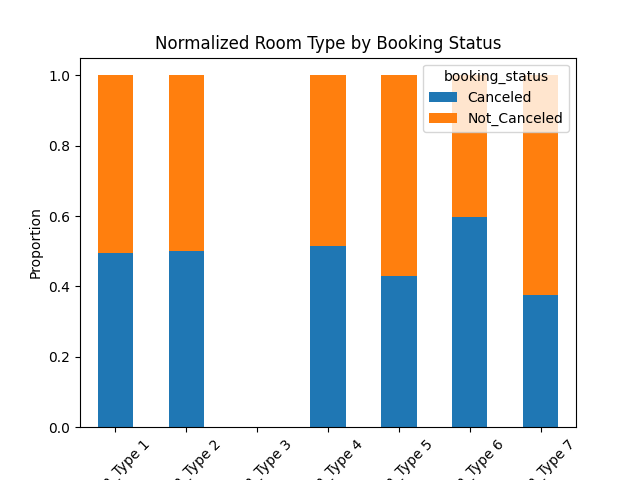

In [34]:
# Creating a normalized bar chart to visualize the proportion of booking statuses within different room types.
cross_tab = pd.crosstab(index=df['room_type_reserved'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Room Type by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

In [35]:
# Count the occurrences of 'market_segment_type' values.
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [36]:
# Creating a stacked bar chart to visualize the relationship between market segments and booking status.
pd.crosstab(df['market_segment_type'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Market Segment by Booking Status')

Text(0.5, 1.0, 'Market Segment by Booking Status')

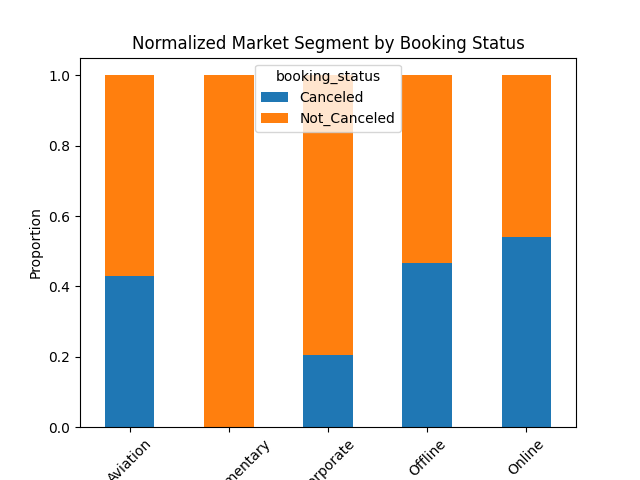

In [37]:
# Create normalized bar charts to visualize the proportion of booking statuses within different market segments.
cross_tab = pd.crosstab(index=df['market_segment_type'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Market Segment by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

## Data Preparation

In [38]:
# Drop non-predictors
df=df.drop(['Booking_ID'],axis=1)

In [39]:
# Convert columns to correct datatypes 

# Categorical='object'/'category'
# Numerical='int'/'float'
df['type_of_meal_plan']=df['type_of_meal_plan'].astype('category')
df['required_car_parking_space']=df['required_car_parking_space'].astype('category')
df['room_type_reserved']=df['room_type_reserved'].astype('category')
df['arrival_year']=df['arrival_year'].astype('category')
df['arrival_month']=df['arrival_month'].astype('category')
df['market_segment_type']=df['market_segment_type'].astype('category')
df['repeated_guest']=df['repeated_guest'].astype('category')
df['booking_status']=df['booking_status'].astype('category')

# Show all categorical data
print('Categorical attributes \n',df.select_dtypes(include=['category']).columns)

# Show all numerical data
print('\n Numerical attributes \n',df.select_dtypes(include=['integer','float']).columns)

Categorical attributes 
 Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'market_segment_type',
       'repeated_guest', 'booking_status'],
      dtype='object')

 Numerical attributes 
 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


### Feature Engineering

1. Calculate cancellation rate based on the number of previous cancellations out of all bookings

In [40]:
# Calculate the cancellation rate based on previous cancellations and bookings.
df['cancellation_rate']=df['no_of_previous_cancellations']/((df['no_of_previous_cancellations'])+(df['no_of_previous_bookings_not_canceled']))
df['cancellation_rate']=df['cancellation_rate'].astype('float64')
df['cancellation_rate'].value_counts()

cancellation_rate
0.000000    592
1.000000    118
0.166667     16
0.200000     15
0.333333     15
           ... 
0.089286      1
0.120000      1
0.075000      1
0.078947      1
0.190476      1
Name: count, Length: 81, dtype: int64

The cancellation rate uses historic bookings to calculate the guest's overall rate of bookings fulfilled, where 0 = a customer has fulfilled every booking and 1 = a customer has canceled every booking. 

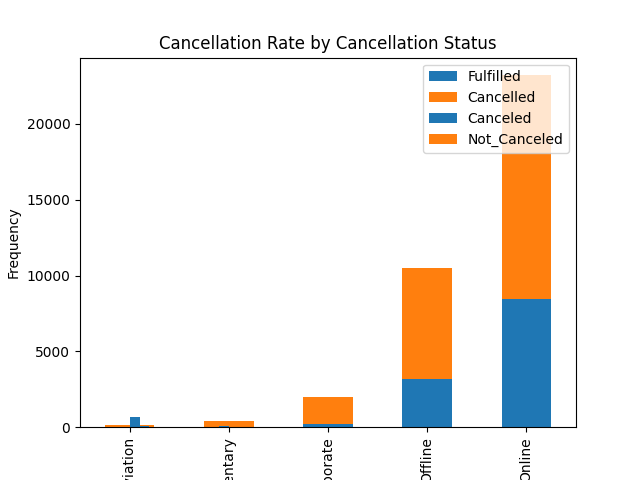

In [41]:
# Extract cancellation rates for both canceled and not-canceled bookings.
y1 = list(df[df['booking_status'] == 'Canceled']['cancellation_rate'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['cancellation_rate'])

# Define labels for the two categories.
names = ['Fulfilled','Cancelled']

# Create a histogram to visualize the distribution of cancellation rates by cancellation status.
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Cancellation Rate')
plt.ylabel('Frequency')
plt.title('Cancellation Rate by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

2. Get full arrival date by combining year, month, and day

In [42]:
# Combine year, month, day into 1 column in datetime format ('full_arrival_date')
df['day']=df['arrival_date'].copy()
df['month']=df['arrival_month'].copy()
df['year']=df['arrival_year'].copy()
df['full_arrival_date']=pd.to_datetime(df[['year','month','day']],format='%Y-%M-%D',errors='coerce')

3. Get total number of guests

In [43]:
# Calculate the total number of guests by summing the number of adults and children.
df['total_guests']=df['no_of_adults']+df['no_of_children']

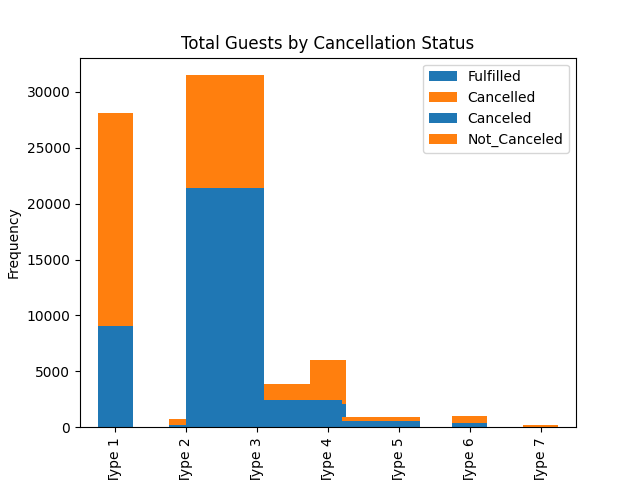

In [44]:
# Extract the total number of guests for both canceled and not-canceled bookings.
y1 = list(df[df['booking_status'] == 'Canceled']['total_guests'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_guests'])

# Define labels for the two categories.
names = ['Fulfilled','Cancelled']

# Create a histogram to visualize the distribution of total guests by cancellation status.
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Guests')
plt.ylabel('Frequency')
plt.title('Total Guests by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

4. Get total number of nights for each booking

In [45]:
# Calculate the total number of nights for each reservation by adding the weekend nights and week nights.
df['total_nights']=df['no_of_weekend_nights']+df['no_of_week_nights']

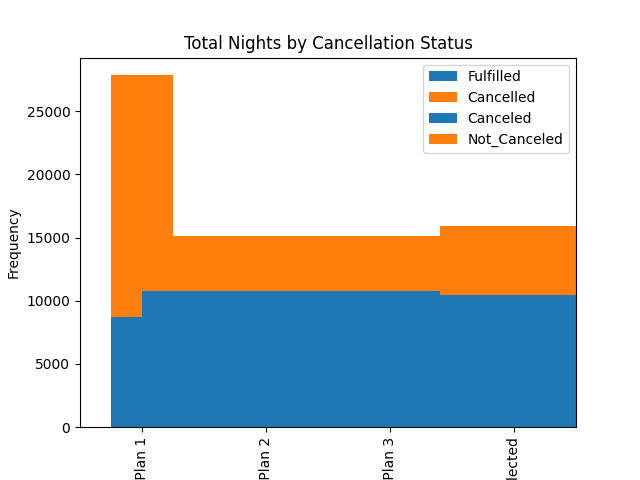

In [46]:
# Extract the total number of nights for both canceled and not-canceled bookings.
y1 = list(df[df['booking_status'] == 'Canceled']['total_nights'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_nights'])

# Define labels for the two categories.
names = ['Fulfilled','Cancelled']

# Create a histogram to visualize the distribution of total nights by cancellation status.
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.title('Total Nights by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

5. Get seasonality from arrival month

In [47]:
# Define a mapping function to assign seasons based on arrival month.
def map_to_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Unknown'  # Handle any unexpected values

# Apply mapping function to create a new 'season' column
df['season'] = df['arrival_month'].apply(map_to_season)
df['season']=df['season'].astype('category')
df['season'].value_counts()

season
Autumn    12908
Summer     9936
Spring     7692
Winter     5739
Name: count, dtype: int64

In [48]:
# Create a stacked bar chart to visualize the relationship between seasons and booking status.
pd.crosstab(df['season'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Season by Booking Status')

Text(0.5, 1.0, 'Season by Booking Status')

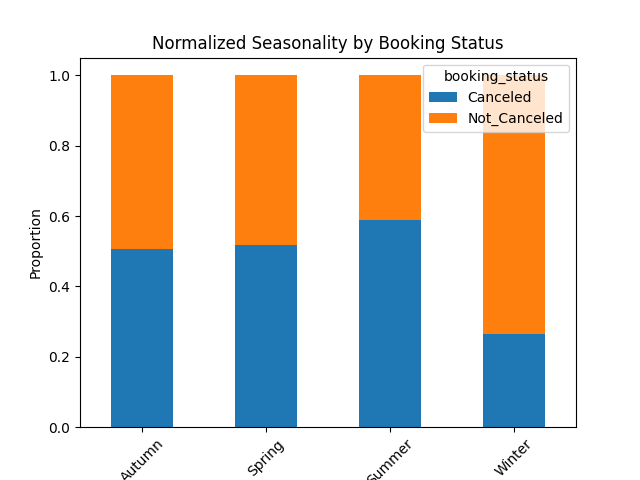

In [49]:
# Create normalized bar charts to visualize the proportion of booking statuses within different seasons.
cross_tab = pd.crosstab(index=df['season'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
# Create a stacked bar chart to display the normalized booking status by seasonality.
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
# Set the chart title and adjust the x-axis labels for readability and label the y-axis to indicate proportion
plt.title(f"Normalized Seasonality by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Past guests have a lower cancellation rate

6. Past Cancellation (0- No, 1-Yes)

In [50]:
# Show value counts
df['no_of_previous_cancellations'].value_counts()


no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

Most guests did not have a previous cancellation. We will convert this numerical variable to a binary variable where:

    * 0 = guest did not have a previous cancellation
    * 1 = guest had at least 1 previous cancellation

In [51]:
# Make binary; 0=no past cancellations, 1=at least 1 past cancellation
df['past_cancellation'] = df['no_of_previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)
df['past_cancellation']=df['past_cancellation'].astype('category')

In [52]:
# Create a stacked bar chart to visualize the relationship between past cancellations and booking status.
pd.crosstab(df['past_cancellation'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Past Cancellation by Booking Status')

Text(0.5, 1.0, 'Past Cancellation by Booking Status')

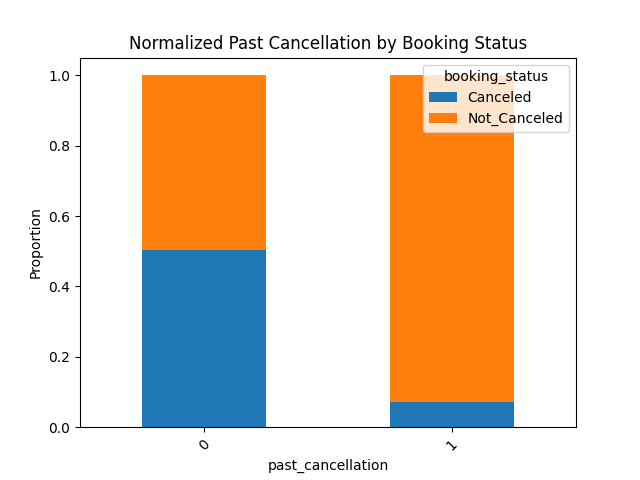

In [53]:
# Create normalized bar charts to visualize the proportion of booking statuses based on past cancellations.
cross_tab = pd.crosstab(index=df['past_cancellation'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Past Cancellation by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

7. Total Reservation Price

In [54]:
# Calculate the total reservation price by multiplying the total number of nights and the average price per room.
df['total_price'] = pd.array(df['total_nights'])*pd.array(df['avg_price_per_room'])

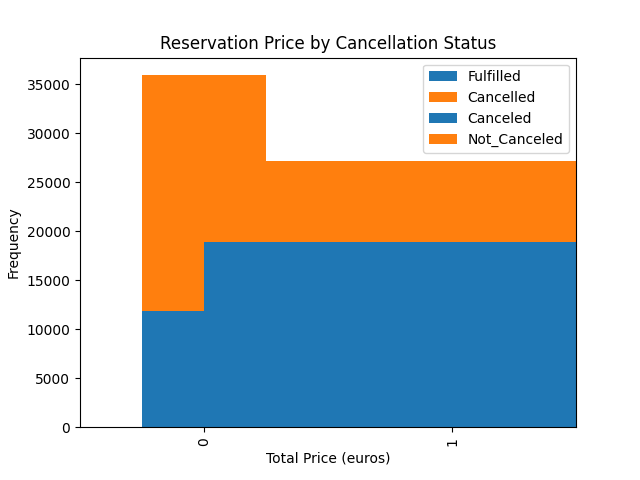

In [55]:
# Extract the total reservation price for both canceled and not-canceled bookings.
y1 = list(df[df['booking_status'] == 'Canceled']['total_price'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_price'])
# Define labels for the two categories.
names = ['Fulfilled','Cancelled']
# Create a histogram to visualize the distribution of reservation prices by cancellation status.
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Price (euros)')
plt.ylabel('Frequency')
plt.title('Reservation Price by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

8. Meal plan as binary

In [56]:
# Create a binary column 'meal_plan' based on the 'type_of_meal_plan,' where 0 represents 'Not Selected' and 1 represents 'Selected.'
df['meal_plan'] = df['type_of_meal_plan'].apply(lambda x: 0 if x == 'Not Selected' else 1)
df['meal_plan']=df['meal_plan'].astype('category')

In [57]:
# Create a stacked bar chart to visualize the relationship between meal plans and booking status.
pd.crosstab(df['meal_plan'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Meal Plan by Booking Status')

Text(0.5, 1.0, 'Meal Plan by Booking Status')

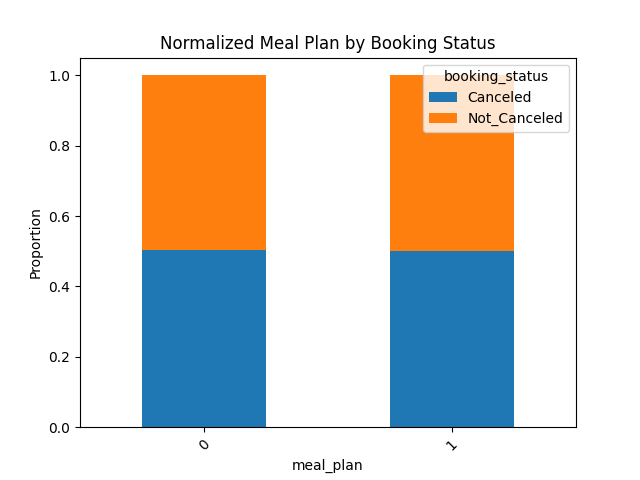

In [58]:
# Create normalized bar charts to visualize the proportion of booking statuses with respect to meal plans.
cross_tab = pd.crosstab(index=df['meal_plan'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Meal Plan by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

No significant difference between guests that selected a meal plan compared to guests that didn't. 

9. Room type as binary

In [59]:
# Create a binary column 'room_type' based on the 'room_type_reserved,' where 1 represents 'Room_Type 1' and 0 represents 'Other.'
df['room_type'] = df['room_type_reserved'].apply(lambda x: 1 if x == 'Room_Type 1' else 0)
df['room_type']=df['room_type'].astype('category')

In [60]:
# Create a stacked bar chart to visualize the relationship between room types and booking status.
pd.crosstab(df['room_type'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Room Type by Booking Status')

Text(0.5, 1.0, 'Room Type by Booking Status')

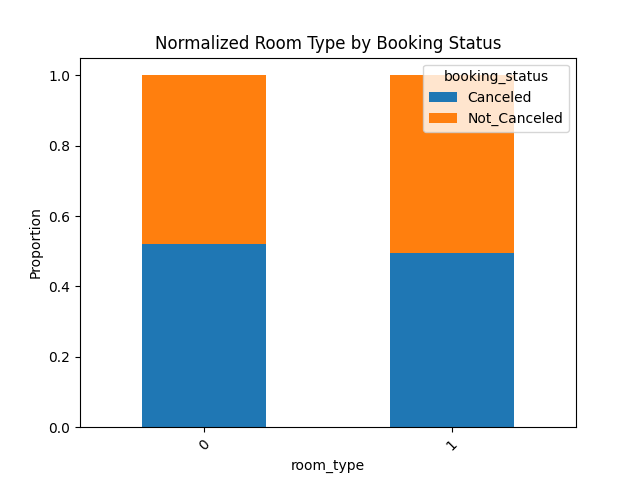

In [61]:
# Create normalized bar charts to visualize the proportion of booking statuses based on room types.
cross_tab = pd.crosstab(index=df['room_type'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Room Type by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

No significant difference between room types chosen

10. Special Requests as Binary

Most guests had at least 1 special request or none.

In [62]:
# Count the frequency of the number of special requests.
df['no_of_special_requests'].value_counts()

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

In [63]:
# Create a binary column 'special_requests' based on the 'no_of_special_requests,' where 1 indicates the presence of special requests (more than 0) and 0 indicates no special requests.
df['special_requests'] = df['no_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)
df['special_requests']=df['special_requests'].astype('category')
df['special_requests'].value_counts()

special_requests
0    19777
1    16498
Name: count, dtype: int64

In [64]:
# Create a stacked bar chart to visualize the relationship between special requests and booking status.
pd.crosstab(df['special_requests'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Special Requests by Booking Status')

Text(0.5, 1.0, 'Special Requests by Booking Status')

In [65]:
# Create a normalized stacked bar chart to visualize the relationship between special requests and booking status.
pd.crosstab(df['special_requests'], df['booking_status'], normalize = 'index').plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Special Requests by Booking Status')

Text(0.5, 1.0, 'Special Requests by Booking Status')

In [66]:
# Show all columns, including all added columns
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'cancellation_rate', 'day', 'month', 'year', 'full_arrival_date',
       'total_guests', 'total_nights', 'season', 'past_cancellation',
       'total_price', 'meal_plan', 'room_type', 'special_requests'],
      dtype='object')

## Exploratory Data Analysis

In [67]:
#Get a list of numeric column names in a DataFrame.
def numeric_cols(data):
    num_cols = []
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            num_cols.append(col)
    return num_cols
numeric_columns = numeric_cols(df)
print(numeric_columns)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'cancellation_rate', 'day', 'total_guests', 'total_nights', 'total_price']


In [68]:
#Get a list of categorical column names in a DataFrame.
def category_columns(data):
  cat_cols = []
  for i in data:
    if data[i].dtype == 'object' or data[i].dtype == 'category':
      cat_cols.append(i)
  return cat_cols
categorical_columns = category_columns(df)
print(categorical_columns)


['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'booking_status', 'month', 'year', 'season', 'past_cancellation', 'meal_plan', 'room_type', 'special_requests']


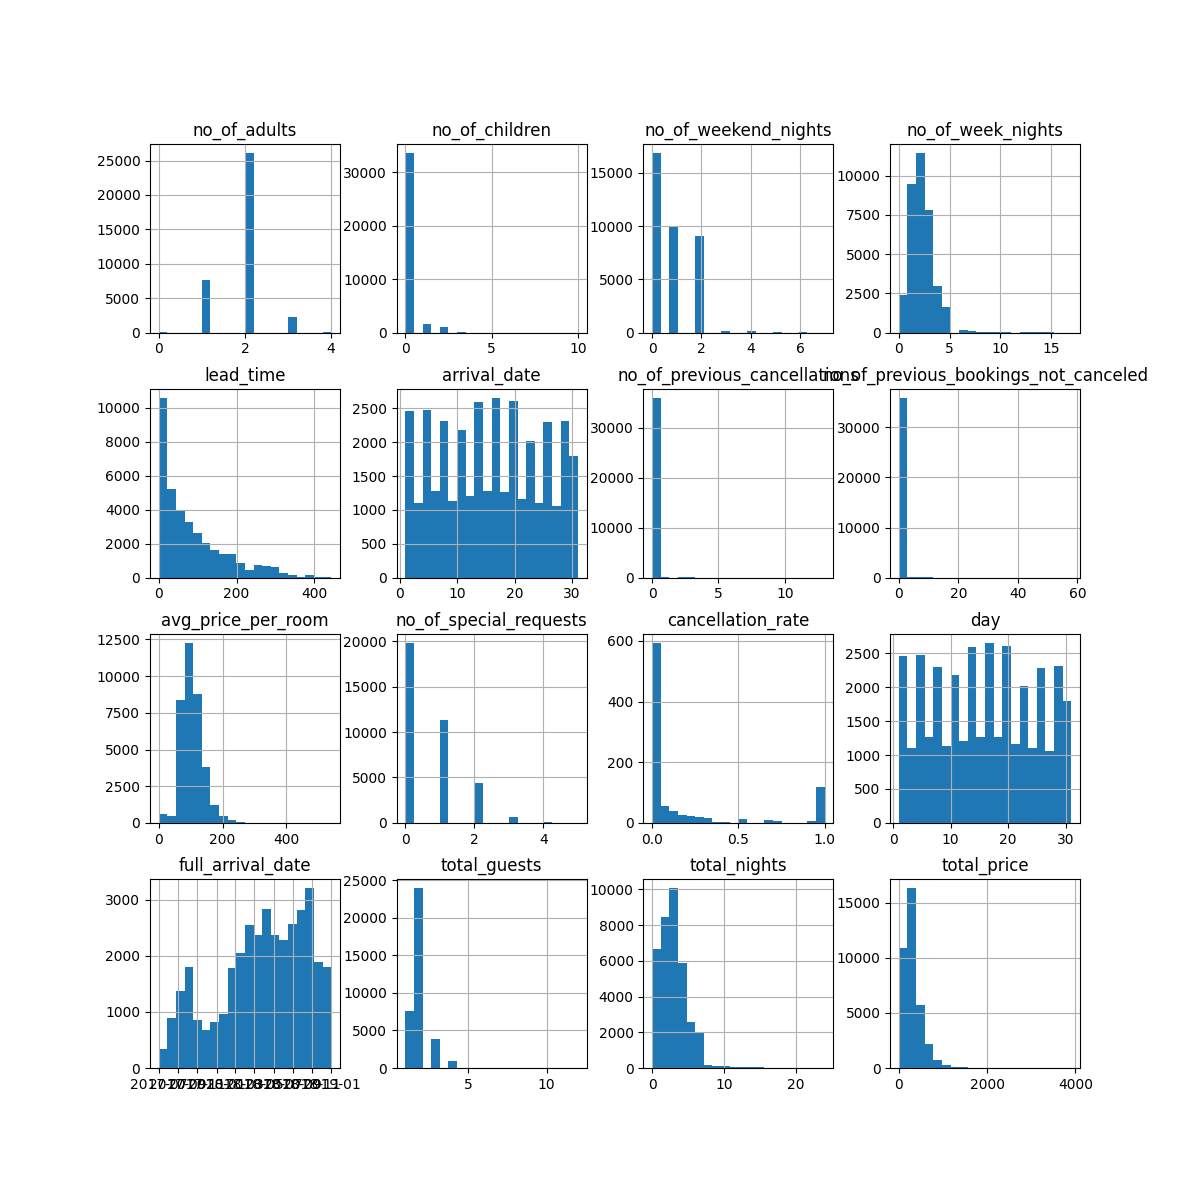

In [69]:
#Distributions for numerical variables
df.hist(figsize=(12,12),bins=20)
plt.show()

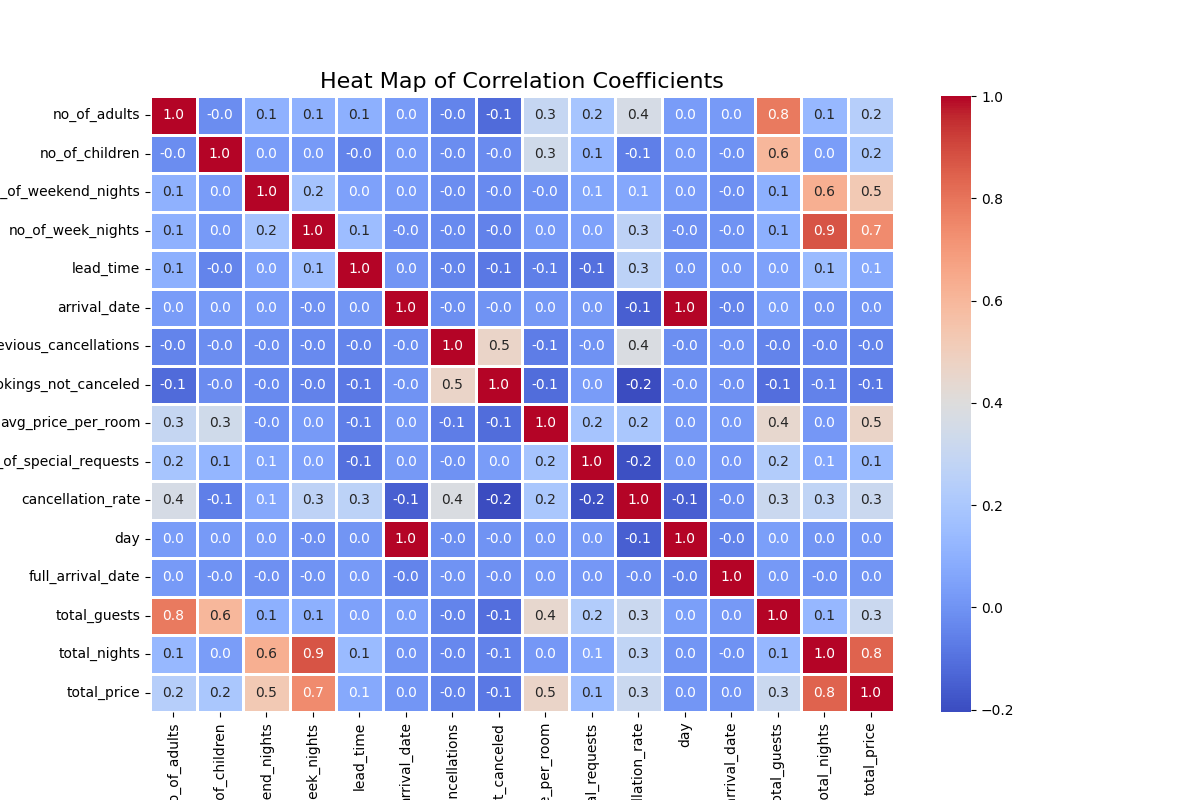

In [70]:
# Drop the categorical columns before calculating correlations
non_categorical_columns = df.select_dtypes(exclude=['category']).columns
df_numerical = df[non_categorical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a figure and set the title
plt.figure(figsize=(12, 8))
plt.title("Heat Map of Correlation Coefficients", fontsize=16)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.1f', linewidths=1, annot=True)

# Display the heatmap
plt.show()



In [71]:
# correlation matrix for numerical columns in the DataFrame.
correlation_matrix

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,cancellation_rate,day,full_arrival_date,total_guests,total_nights,total_price
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.097287,0.026338,-0.047426,-0.119166,0.296886,0.189401,0.363589,0.026338,0.023652,0.785371,0.133803,0.241718
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.047091,0.025482,-0.016390,-0.021189,0.337728,0.124486,-0.060046,0.025482,-0.002909,0.603365,0.033644,0.198209
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.046595,0.027304,-0.020690,-0.026312,-0.004525,0.060593,0.067632,0.027304,-0.007145,0.100658,0.629339,0.525327
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.149650,-0.009305,-0.030080,-0.049344,0.022753,0.045994,0.266809,-0.009305,-0.000098,0.099352,0.877513,0.739939
lead_time,0.097287,-0.047091,0.046595,0.149650,1.000000,0.006479,-0.045723,-0.078137,-0.062596,-0.101645,0.261401,0.006479,0.023737,0.048441,0.140934,0.076493
arrival_date,0.026338,0.025482,0.027304,-0.009305,0.006479,1.000000,-0.012542,-0.001498,0.017898,0.018352,-0.149283,1.000000,-0.047078,0.036785,0.005960,0.008446
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,-0.045723,-0.012542,1.000000,0.468147,-0.063340,-0.003317,0.379768,-0.012542,-0.001110,-0.047975,-0.033849,-0.048069
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,-0.078137,-0.001498,0.468147,1.000000,-0.113684,0.027377,-0.204408,-0.001498,-0.007348,-0.108168,-0.051807,-0.077407
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,-0.062596,0.017898,-0.063340,-0.113684,1.000000,0.184381,0.200016,0.017898,0.019814,0.445906,0.015768,0.467291
no_of_special_requests,0.189401,0.124486,0.060593,0.045994,-0.101645,0.018352,-0.003317,0.027377,0.184381,1.000000,-0.192821,0.018352,0.016505,0.228146,0.065871,0.142985


In [72]:
# numeric columns for the box plot
numeric_columns = ['no_of_adults', 'no_of_children',
                    'total_guests',
                   'no_of_weekend_nights', 'no_of_week_nights',
                   #'required_car_parking_space', 'arrival_year',
                   'lead_time',
                   #'arrival_month', 'arrival_date', 'repeated_guest', 
                   'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled', 
                   'avg_price_per_room', 'no_of_special_requests',
                  'cancellation_rate', 'total_price']

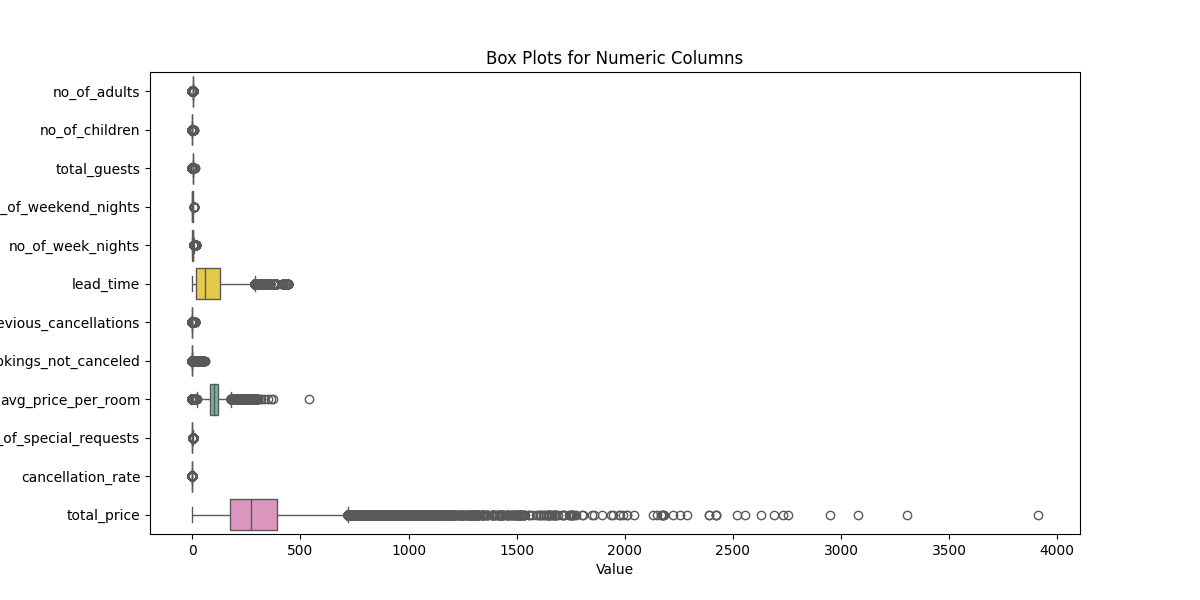

In [73]:
# Create box plots for numeric columns to visualize the distribution of data.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numeric Columns")
plt.xlabel("Value")
plt.show()


In [74]:
# Create cross-tabulations for each categorical variable against booking status.
df_cat = df[categorical_columns]
# Create cross-tab for categorical variables
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    print(cross_tab)
    print("\n")

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Meal Plan 2            1506          1799
Meal Plan 3               1             4
Not Selected           1699          3431


booking_status              Canceled  Not_Canceled
required_car_parking_space                        
0                              11771         23380
1                                114          1010


booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1             9072         19058
Room_Type 2              228           464
Room_Type 3                2             5
Room_Type 4             2069          3988
Room_Type 5               72           193
Room_Type 6              406           560
Room_Type 7               36           122


booking_status  Canceled  Not_Canceled
arrival_year                          
2017                 961          5553
2018               10924         1

Checking for outlier

In [75]:
# Save the DataFrame to a CSV file, excluding the index column.
df.to_csv('hotel_reservations_for_modeling.csv',index=False)

## **Data Split and Preprocessing Pipeline**

In [76]:
# Display the column names of the DataFrame.
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'cancellation_rate', 'day', 'month', 'year', 'full_arrival_date',
       'total_guests', 'total_nights', 'season', 'past_cancellation',
       'total_price', 'meal_plan', 'room_type', 'special_requests'],
      dtype='object')

In [77]:
# Define a list of categorical predictors for the model.
cats = ['market_segment_type', 'season','required_car_parking_space',
        'repeated_guest','special_requests']
# Define a list of numerical predictors for the model.
nums = ['lead_time', 'total_price', 'total_guests']
        #'cancellation_rate']
# Combine categorical and numerical predictors into a single list.
all_vars = cats+nums
print(f"Predictors used for modeling: \n", all_vars)

Predictors used for modeling: 
 ['market_segment_type', 'season', 'required_car_parking_space', 'repeated_guest', 'special_requests', 'lead_time', 'total_price', 'total_guests']


In [78]:
# Create a binary target variable 'book_binary' where 1 represents 'Canceled' and 0 represents 'Not Canceled'.
df['book_binary'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [79]:
# Print the count of binary target variable 'book_binary,' showing the number of Canceled (1) and Not Canceled (0) bookings.
print(df['book_binary'].value_counts())

# Print the proportion of Canceled (1) and Not Canceled (0) bookings in the dataset.
print('\n', df['book_binary'].value_counts()/len(df))

book_binary
0    24390
1    11885
Name: count, dtype: int64

 book_binary
0    0.672364
1    0.327636
Name: count, dtype: float64


The original dataset is imbalanced, with 33% (11885) cancellations and 67% (24390) non-cancellations. A stratified split will be used to create the training, validation, and testing sets to preserve these proportions. Then, the training set will be further processed to be balanced with a 50/50 split of donations/non-donations. 

In [80]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that includes variance thresholding and power transformation.
num_pipe = Pipeline([('variance', VarianceThreshold()),('skew_standardize', PowerTransformer())])
#set_config(transform_output="pandas")
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats),('num', num_pipe, nums)],
                                          verbose_feature_names_out=False))
all_pipe.named_steps


{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['market_segment_type', 'season',
                                   'required_car_parking_space',
                                   'repeated_guest', 'special_requests']),
                                 ('num',
                                  Pipeline(steps=[('variance',
                                                   VarianceThreshold()),
                                                  ('skew_standardize',
                                                   PowerTransformer())]),
                                  ['lead_time', 'total_price', 'total_guests'])],
                   verbose_feature_names_out=False)}

## Creating a balanced training dataset

In [81]:
# Split the data into features (X) and the binary target variable (y).
X = df[all_vars]
y = df['book_binary']
# Perform a three-way split: training, validation, and test sets.
# First, split the data into training (X_train, y_train) and the rest (X_test, y_test).
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, stratify=y, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=.50, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)
# Print the shapes of the resulting datasets for verification.

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(27000, 8)
(27000,)
(4637, 8)
(4637,)
(4638, 8)
(4638,)


In [82]:
# Confirm stratified split 
y_train.value_counts()/len(y_train)

book_binary
0    0.67237
1    0.32763
Name: count, dtype: float64

In [83]:
# Count the number of instances for each unique value in the y_train 
y_train.value_counts()

book_binary
0    18154
1     8846
Name: count, dtype: int64

In [84]:
#from imblearn.over_sampling import RandomOverSampler
#ros=RandomOverSampler(random_state=1)
#X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# Check proportions 
#y_train_over.value_counts()

In [85]:
# Create a RandomUnderSampler instance with a specified random seed and sampling strategy
rus = RandomUnderSampler(random_state = 1, sampling_strategy='majority')

# Perform random under-sampling on the training dataset
X_train_under, y_train_under =rus.fit_resample(X_train, y_train)

# Check proportions 
y_train_under.value_counts()

book_binary
1    8846
0    8846
Name: count, dtype: int64

In [86]:
# Display information about the X_train_under dataset
X_train_under.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17692 entries, 1067 to 28199
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   market_segment_type         17692 non-null  category
 1   season                      17692 non-null  category
 2   required_car_parking_space  17692 non-null  category
 3   repeated_guest              17692 non-null  category
 4   special_requests            17692 non-null  category
 5   lead_time                   17692 non-null  int64   
 6   total_price                 17692 non-null  float64 
 7   total_guests                17692 non-null  int64   
dtypes: category(5), float64(1), int64(2)
memory usage: 640.0 KB


## Transform Datasets with Pipeline

In [87]:
#Fit pipeline to resampled data
X_train_resampled = all_pipe.fit(X_train_under)
#Get feature names out from fit and create as new list
X_train_cols = X_train_resampled.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_train_bal = pd.DataFrame(all_pipe.fit_transform(X_train_under), columns = X_train_cols)

In [88]:
#Create new dataframe with transformed validation and testing data, and apply feature name list as column names
X_val = pd.DataFrame(all_pipe.fit_transform(X_val), columns = X_train_cols)
X_test = pd.DataFrame(all_pipe.fit_transform(X_test), columns = X_train_cols)

In [89]:
# Display the shapes of different datasets to check their dimensions
X_train_bal.shape, X_val.shape, X_test.shape

((17692, 15), (4637, 15), (4638, 15))

In [90]:
# View the balanced training data
X_train_bal.head()

,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_Autumn,season_Spring,season_Summer,season_Winter,required_car_parking_space_1,repeated_guest_1,special_requests_1,lead_time,total_price,total_guests
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.826710,1.050635,0.137698
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.465769,-1.355087,-1.667318
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.001580,0.086355,0.137698
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.461213,0.183550,0.137698
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238323,-0.323012,0.137698


### Predictors for logistic regression with one of the dummies removed: need C-1 dummies for linear models

In [91]:
# Remove specific columns from the datasets
X_train_log = X_train_bal.drop(['market_segment_type_Aviation', 'season_Autumn'], axis = 1)
X_val_log = X_val.drop(['market_segment_type_Aviation', 'season_Autumn'], axis = 1)
X_test_log = X_test.drop(['market_segment_type_Aviation', 'season_Autumn'], axis = 1)

# Feature Importance

In [92]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier with 100 trees (you can adjust the number of trees) and set a random seed for reproducibility
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)  

# Fit (train) the Random Forest classifier on the balanced training data
random_forest.fit(X_train_bal, y_train_under)


RandomForestClassifier(random_state=1)

In [93]:
# Get feature importance scores
importances=random_forest.feature_importances_
feature_importance_pairs=list(zip(X_train_bal.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
lead_time: 0.4413
total_price: 0.3092
special_requests_1: 0.0955
total_guests: 0.0321
market_segment_type_Online: 0.0312
market_segment_type_Offline: 0.0223
season_Winter: 0.0217
required_car_parking_space_1: 0.0084
season_Spring: 0.0081
season_Summer: 0.0079
season_Autumn: 0.0075
market_segment_type_Corporate: 0.0068
repeated_guest_1: 0.0058
market_segment_type_Complementary: 0.0014
market_segment_type_Aviation: 0.0007


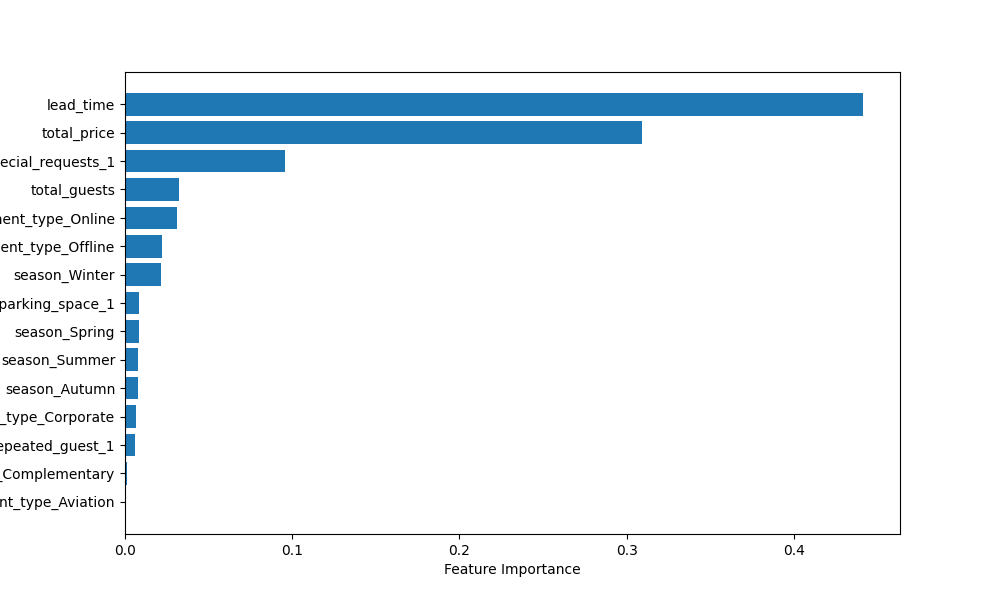

In [94]:
# Extract feature names and importances
feature_names, importances = zip(*sorted_feature_importance_pairs)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

The most important features were lead time, total price, and whether the guest had a special request. 

# Model Training

## L2 penalized logistic regression with balanced data

In [95]:
# Create Logistic Regression model with L2 regularization
log_l2_bal = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1)
# Fit the model to the training data
log_l2_bal.fit(X_train_log, y_train_under.values.ravel())

LogisticRegressionCV(cv=5, random_state=1)

In [96]:
# Retrieve the coefficients of the trained Logistic Regression model
log_l2_bal.coef_

array([[-0.05586689, -0.09058129, -0.59656903,  0.67792759,  0.08227876,
         0.13662713, -0.45866358, -0.35993276, -0.17111891, -1.38865516,
         1.08625156,  0.21449904,  0.04635123]])

## KNN Classifier

In [97]:
# Initialize an empty list to store KNN results
knn_results = []
for k in range (1, 11):
    # Create a K-Nearest Neighbors model with k neighbors and fit it to the balanced training data
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train_bal, y_train_under.values.ravel())
    # Calculate and append results to the list
    knn_results.append({
        'k': k,
        'Accuracy': accuracy_score(y_val.values.ravel(), knn_mod.predict(X_val)) 
    })
# Create a DataFrame from the list of KNN results    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

In [98]:
# Display the results
knn_results

,k,Accuracy
0,1,0.725900
1,2,0.783696
2,3,0.758680
3,4,0.791029
4,5,0.775286
5,6,0.792323
6,7,0.786069
7,8,0.802674
8,9,0.791891
9,10,0.803968


In [99]:
# Create a K-Nearest Neighbors (KNN) classifier with 4 neighbors and fit it to the balanced training data
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train_bal, y_train_under.values.ravel())

## Neural Network Classifier

In [100]:
# Create a Multi-layer Perceptron (MLP) classifier with specified settings and fit it to the balanced training data
nn = MLPClassifier(hidden_layer_sizes=(6,4), activation = 'logistic', max_iter = 500, solver = 'lbfgs', random_state=1)
nn.fit(X_train_bal, y_train_under.values.ravel())

MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 4), max_iter=500,
              random_state=1, solver='lbfgs')

## Boosted Tree Classifier

In [101]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [9,10,11,12,13],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [17,18,19,20,21],
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_search.fit(X_train_bal, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree = tree_search.best_params_

# Model Performance

## Log reg with balanced data

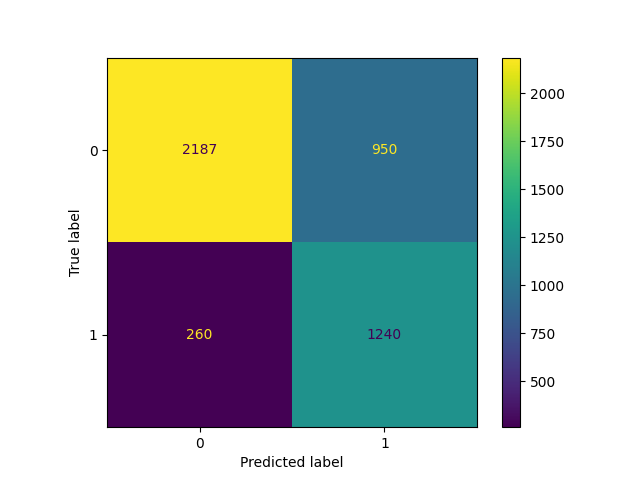

In [102]:
#Confusion matrix for logistic regression balanced
log_cm_bal = confusion_matrix(y_true = y_val, y_pred = log_l2_bal.predict(X_val_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
plt.show() 

In [103]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_val, log_l2_bal.predict(X_val_log))
auc = round(roc_auc_score(y_val, log_l2_bal.predict(X_val_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

Text(59.266971879535255, 0.5, 'True Positive Rate')

In [104]:
#Sensitivity, specificity, and accuracy for log reg with balanced data
#Much improved
log_sens_bal = sensitivity_score(y_val, log_l2_bal.predict(X_val_log))
log_spec_bal = specificity_score(y_val, log_l2_bal.predict(X_val_log))
log_acc_bal = accuracy_score(y_val, log_l2_bal.predict(X_val_log))
log_sens_bal, log_spec_bal, log_acc_bal

(0.8266666666666667, 0.6971628944851769, 0.7390554237653656)

## Decision Tree

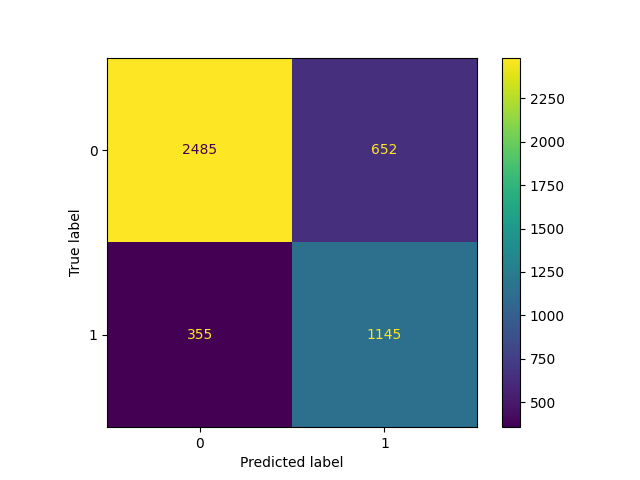

In [105]:
#Confusion matrix for logistic regression balanced
tree_cm_bal = confusion_matrix(y_true = y_val, y_pred = tree_search.predict(X_val), labels = tree_search.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_search.classes_)
tree_disp_bal.plot()
plt.show() 

In [106]:
#ROC curve for tree
fpr, tpr, thresholds = roc_curve(y_val, tree_search.predict(X_val))
auc = round(roc_auc_score(y_val, tree_search.predict(X_val)), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

Text(59.266971879535255, 0.5, 'True Positive Rate')

In [107]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree_sens_bal = sensitivity_score(y_val, tree_search.predict(X_val))
tree_spec_bal = specificity_score(y_val, tree_search.predict(X_val))
tree_acc_bal = accuracy_score(y_val, tree_search.predict(X_val))
tree_sens_bal, tree_spec_bal, tree_acc_bal

(0.7633333333333333, 0.7921581128466688, 0.7828337287039033)

## KNN

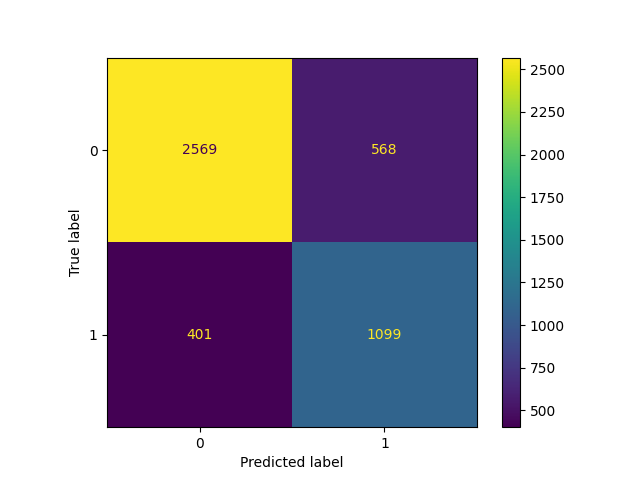

In [108]:
# Compute the confusion matrix for KNN model on the validation data
knn_cm_bal = confusion_matrix(y_true = y_val, y_pred = knn.predict(X_val), labels = knn.classes_)
# Create a ConfusionMatrixDisplay object for visualization
knn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= knn_cm_bal, display_labels=knn.classes_)
knn_disp_bal.plot()
warnings.filterwarnings('ignore')
plt.show()

In [109]:
#ROC curve for KNN
fpr, tpr, thresholds = roc_curve(y_val, knn.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

Text(59.266971879535255, 0.5, 'True Positive Rate')

In [110]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced data
#Much improved
knn_sens_bal = sensitivity_score(y_val, knn.predict(X_val))
knn_spec_bal = specificity_score(y_val, knn.predict(X_val))
knn_acc_bal = accuracy_score(y_val, knn.predict(X_val))
warnings.filterwarnings('ignore')
knn_sens_bal, knn_spec_bal, knn_acc_bal

(0.7326666666666667, 0.81893528849219, 0.7910286823377184)

## Neural network

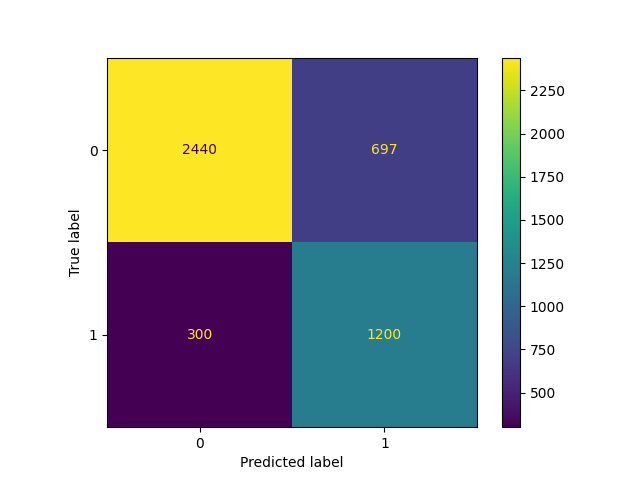

In [111]:
# Compute the confusion matrix for the Neural Network (nn) model on the validation data
nn_cm_bal = confusion_matrix(y_true = y_val, y_pred = nn.predict(X_val), labels = nn.classes_)
nn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= nn_cm_bal, display_labels=nn.classes_)
# Plot the Neural Network confusion matrix
nn_disp_bal.plot()
plt.show() 

In [112]:
#ROC curve for Neural Network
fpr, tpr, thresholds = roc_curve(y_val, nn.predict(X_val))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

Text(59.266971879535255, 0.5, 'True Positive Rate')

In [113]:
#Sensitivity, specificity, and accuracy for neural net
nn_sens = sensitivity_score(y_val, nn.predict(X_val))
nn_spec = specificity_score(y_val, nn.predict(X_val))
nn_acc = accuracy_score(y_val, nn.predict(X_val))
nn_sens, nn_spec, nn_acc

(0.8, 0.7778131973222825, 0.7849902954496442)

# Compiled ROC Curves for All Models on Unbalanced Validation Data

In [114]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_val, log_l2_bal.predict(X_val_log))
auc_log = round(roc_auc_score(y_val, log_l2_bal.predict(X_val_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc_log))

fpr, tpr, thresholds = roc_curve(y_val, tree_search.predict(X_val))
auc_tree = round(roc_auc_score(y_val, tree_search.predict(X_val)), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc_tree))

fpr, tpr, thresholds = roc_curve(y_val, knn.predict(X_val))
auc_knn = round(roc_auc_score(y_val, knn.predict(X_val)), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbors, AUC="+str(auc_knn))

fpr, tpr, thresholds = roc_curve(y_val, nn.predict(X_val))
auc_nn = round(roc_auc_score(y_val, nn.predict(X_val)), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc_nn))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curves for Validation Data')
plt.legend()
plt.savefig('ROCs.png')

# Validation Performance Metrics

In [118]:
#pip install tabulate



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [120]:
from tabulate import tabulate
# Create a table to display performance metrics for different models on the validation dataset

val_performance = [
{'Model': 'Logistic Regression', 'Validation Sensitivity': log_sens_bal, 'Validation Specificity':log_spec_bal, 
 'Accuracy': log_acc_bal, 'Area Under Curve':auc_log},
    {'Model': 'Boosted Tree', 'Validation Sensitivity': tree_sens_bal, 'Validation Specificity':tree_spec_bal, 
 'Accuracy': tree_acc_bal, 'Area Under Curve':auc_tree},
    {'Model': 'K-Nearest Neighbors', 'Validation Sensitivity': knn_sens_bal, 'Validation Specificity':knn_spec_bal, 
 'Accuracy': knn_acc_bal, 'Area Under Curve':auc_knn},
    {'Model': 'Neural Network', 'Validation Sensitivity': nn_sens, 'Validation Specificity':nn_spec, 
 'Accuracy': nn_acc, 'Area Under Curve':auc_nn}]
# Create a formatted table using tabulate and specify the format as 'fancy_grid'
table = tabulate(val_performance, headers='keys', tablefmt='fancy_grid')
# Display the comparison table
print(table)
plt.savefig('val_table.png',
            bbox_inches='tight',
            dpi=150
            )

╒═════════════════════╤══════════════════════════╤══════════════════════════╤════════════╤════════════════════╕
│ Model               │   Validation Sensitivity │   Validation Specificity │   Accuracy │   Area Under Curve │
╞═════════════════════╪══════════════════════════╪══════════════════════════╪════════════╪════════════════════╡
│ Logistic Regression │                 0.826667 │                 0.697163 │   0.739055 │             0.7619 │
├─────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼────────────────────┤
│ Boosted Tree        │                 0.763333 │                 0.792158 │   0.782834 │             0.7777 │
├─────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼────────────────────┤
│ K-Nearest Neighbors │                 0.732667 │                 0.818935 │   0.791029 │             0.7758 │
├─────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼──────────────

# Top Two Models: Logistic Regression and Neural Network. Compare performance on test set. Calculate AIC scores.

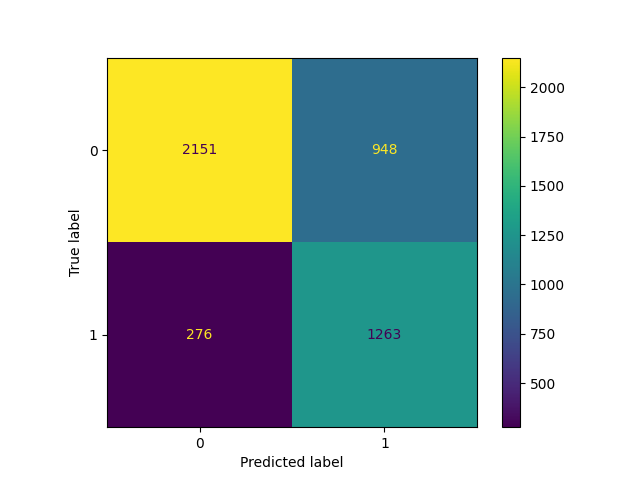

In [121]:
#Confusion matrix for logistic regression balanced
log_cm_bal = confusion_matrix(y_true = y_test, y_pred = log_l2_bal.predict(X_test_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
plt.show() 

In [122]:
# Calculate sensitivity, specificity, and accuracy for the Logistic Regression model on the test data
log_sens_bal = sensitivity_score(y_test, log_l2_bal.predict(X_test_log))
log_spec_bal = specificity_score(y_test, log_l2_bal.predict(X_test_log))
log_acc_bal = accuracy_score(y_test, log_l2_bal.predict(X_test_log))
# Print the calculated sensitivity, specificity, and accuracy
log_sens_bal, log_spec_bal, log_acc_bal

(0.8206627680311891, 0.6940948693126815, 0.7360931435963778)

In [123]:
#Lift curve for logistic regression on test data
plot_lift_curve(y_test, log_l2_bal.predict_proba(X_test_log), title = 'Lift Curve for Logistic Regression')
plt.savefig('LogLift.png')

In [ ]:
#AIC score

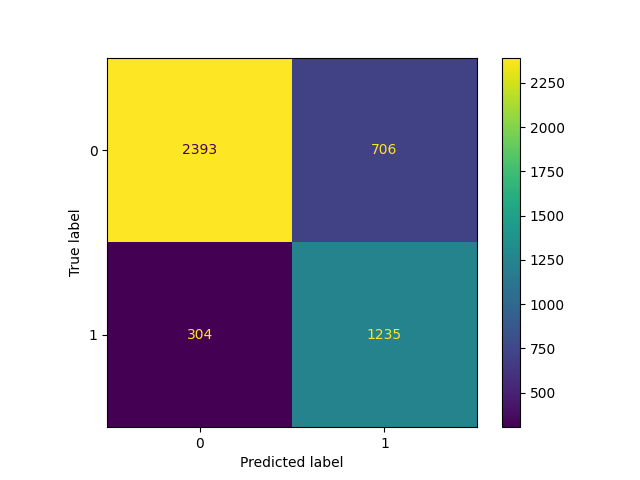

In [124]:
# Compute the confusion matrix for the Neural Network (nn) model on the test data
nn_cm_bal = confusion_matrix(y_true = y_test, y_pred = nn.predict(X_test), labels = nn.classes_)
nn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= nn_cm_bal, display_labels=nn.classes_)
# Plot the Neural Network confusion matrix
nn_disp_bal.plot()
plt.show() 

In [125]:
# Calculate sensitivity, specificity, and accuracy for the Neural Network model on the test data
nn_sens_bal = sensitivity_score(y_test, nn.predict(X_test))
nn_spec_bal = specificity_score(y_test, nn.predict(X_test))
nn_acc_bal = accuracy_score(y_test, nn.predict(X_test))
# Print the calculated sensitivity, specificity, and accuracy
nn_sens_bal, nn_spec_bal, nn_acc_bal

(0.8024691358024691, 0.7721845756695709, 0.7822337214316516)

In [126]:
#Lift curve for neural network on test data
plot_lift_curve(y_test, nn.predict_proba(X_test), title = 'Lift Curve for Neural Network')
plt.savefig('NNLift.png')

In [ ]:
#AIC score

# References
 * https://saturncloud.io/blog/pandas-seaborn-countplot-from-several-columns/
 * https://medium.com/@anderson.riciamorim/how-to-keep-feature-names-in-sklearn-pipeline-e00295359e31
 * https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
 * https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
 * https://www.statology.org/plot-multiple-roc-curves-python/